In [1]:
import numpy as np
import pandas as pd
from imblearn.datasets import fetch_datasets 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import precision_score,recall_score,f1_score,balanced_accuracy_score,classification_report
from yellowbrick.classifier import ClassificationReport,DiscriminationThreshold

In [4]:
data=fetch_datasets()['protein_homo']

In [5]:
df=pd.DataFrame(data=data.data,columns=[str(i) for i in range(74)])

In [6]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,52.0,32.69,0.3,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76
1,58.0,33.33,0.0,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73


In [7]:
df['target']=data.target

In [8]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.3,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.0,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1


In [9]:
df['target']=df['target'].map({-1:0,1:1})

In [10]:
# imbalance ratio
100*df['target'].value_counts()/len(df)

0    99.110812
1     0.889188
Name: target, dtype: float64

Less than 1 % is positive class

In [11]:
df.shape

(145751, 75)

# Train Test Split

In [12]:
X=df.drop(columns=['target'])
y=df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102025, 74)
(43726, 74)
(102025,)
(43726,)


## Baseline Model
### (A model that always predicts the majority class)

In [15]:
y_base_train=pd.Series(np.zeros(len(y_train)))
y_base_test=pd.Series(np.zeros(len(y_test)))

# Train ML models

In [16]:
rf=RandomForestClassifier(max_depth=4,n_jobs=-1,random_state=22)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=22)

In [17]:
y_train_rf=rf.predict_proba(X_train)[:,1]
y_test_rf=rf.predict_proba(X_test)[:,1]

In [18]:
log_reg=LogisticRegression(max_iter=200,random_state=22)

log_reg.fit(X_train,y_train)

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=200, random_state=22)

In [19]:
y_train_logit=log_reg.predict_proba(X_train)[:,1]
y_test_logit=log_reg.predict_proba(X_test)[:,1]

# Accuracy

In [20]:
print('Baseline Accuracy:{}'.format(100*accuracy_score(y_test,y_base_test)))
print('Random Forest Accuracy:{}'.format(100*accuracy_score(y_test,rf.predict(X_test))))
print('Logistic Regression Accuracy:{}'.format(100*accuracy_score(y_test,log_reg.predict(X_test))))

Baseline Accuracy:99.11951699217857
Random Forest Accuracy:99.65695467227737
Logistic Regression Accuracy:99.67525042308924


## Percentage of Minority Correctly Classified

In [21]:
def minority_correct_percent(y_true,y_pred):
    flag=np.where((y_true==1)&(y_pred==1),1,0)    #flag correct classified minority as 1 and incorrect as 0
    
    total_minority=np.sum(y_true)
    minority_correct=np.sum(flag)
    
    return 100*minority_correct/total_minority
    

In [22]:
print("Baseline Model (minority correctly classified): {}".format(minority_correct_percent(y_test,y_base_test)))
print("Random_Forest Model (minority correctly classified): {}".format(minority_correct_percent(y_test,rf.predict(X_test))))
print("Logistic_Reg Model (minority correctly classified): {}".format(minority_correct_percent(y_test,log_reg.predict(X_test))))

Baseline Model (minority correctly classified): 0.0
Random_Forest Model (minority correctly classified): 61.55844155844156
Logistic_Reg Model (minority correctly classified): 67.27272727272727


#### So, only 61% and 67% of minority class were correctly classified by RF and Log_reg models

# Precision
### percent of predicted postives that are actually positive

In [23]:
print('Baseline Precision:{}'.format(100*precision_score(y_test,y_base_test)))
print('Random Forest Precision:{}'.format(100*precision_score(y_test,rf.predict(X_test))))
print('Logistic Regression Precision:{}'.format(100*precision_score(y_test,log_reg.predict(X_test))))

Baseline Precision:0.0


C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Precision:99.16317991631799
Logistic Regression Precision:94.18181818181817


# Recall
### percent of instances of minority that were labelled correctly

In [24]:
print('Baseline Recall:{}'.format(100*recall_score(y_test,y_base_test)))
print('Random Forest Recall:{}'.format(100*recall_score(y_test,rf.predict(X_test),pos_label=1)))
print('Logistic Regression Recall:{}'.format(100*recall_score(y_test,log_reg.predict(X_test),pos_label=1)))

Baseline Recall:0.0
Random Forest Recall:61.55844155844156
Logistic Regression Recall:67.27272727272727


# F1_score
### Mix of Both Precision and Recall

In [25]:
print('Baseline F1_score:{}'.format(100*f1_score(y_test,y_base_test)))
print('Random Forest F1_scorey:{}'.format(100*f1_score(y_test,rf.predict(X_test),pos_label=1)))
print('Logistic Regression F1_score:{}'.format(100*f1_score(y_test,log_reg.predict(X_test),pos_label=1)))

Baseline F1_score:0.0
Random Forest F1_scorey:75.96153846153845
Logistic Regression F1_score:78.48484848484848


# Balanced Accuracy

In [26]:
print('Baseline balanced Accuracy:{}'.format(100*balanced_accuracy_score(y_test,y_base_test)))
print('Random Forest balanced Accuracy:{}'.format(100*balanced_accuracy_score(y_test,rf.predict(X_test))))
print('Logistic Regression balanced Accuracy:{}'.format(100*balanced_accuracy_score(y_test,log_reg.predict(X_test))))

Baseline balanced Accuracy:50.0
Random Forest balanced Accuracy:80.77691349512489
Logistic Regression balanced Accuracy:83.6179053635965


Balanced accuracy of Baseline model is still 50% due to 100% Recall of majority class

# Classification Report

In [27]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43341
           1       0.99      0.62      0.76       385

    accuracy                           1.00     43726
   macro avg       0.99      0.81      0.88     43726
weighted avg       1.00      1.00      1.00     43726



In [28]:
print(classification_report(y_test,log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43341
           1       0.94      0.67      0.78       385

    accuracy                           1.00     43726
   macro avg       0.97      0.84      0.89     43726
weighted avg       1.00      1.00      1.00     43726



# Full Classification Report Yellowbricks

## Random Forest Classification report

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


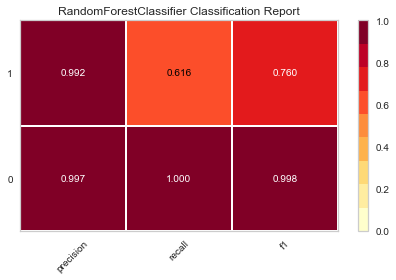

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [29]:
visualizer=ClassificationReport(rf)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

## Logistic Regression Classification report

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


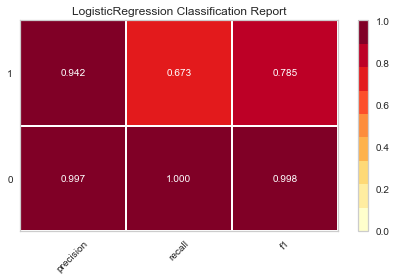

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [30]:
visual_logit=ClassificationReport(log_reg)   #ClassificationReport from yellowbrick package

visual_logit.fit(X_train,y_train)
visual_logit.score(X_test,y_test)
visual_logit.show()

## Conclusion

For the minority Class,Random Forest has better precision than Logistic Regression, but lower Recall.  
That means if minimising False negatives is the objective(Type II error), go with Logistic Regression.  
If minimising false positives is the objective(Type I error), go with Random Forest.

For majority class since support is quite high, both models perform equally well.

# Precision, Recall and Discrimination Threshold

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


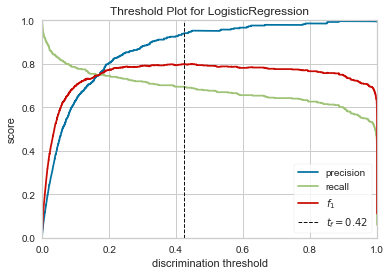

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [32]:
#Logistic Regression
disc_viz_logit=DiscriminationThreshold(log_reg,n_trials=1,cv=0.5,argmax='fscore',random_state=28,exclude='queue_rate')

disc_viz_logit.fit(X_train,y_train)   # fitting threshold visualizer on train data
disc_viz_logit.score(X_test,y_test)
disc_viz_logit.show()

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


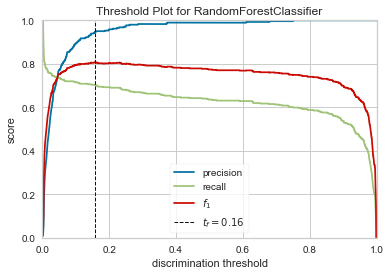

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [34]:
# Random Forest
disc_viz_rf=DiscriminationThreshold(rf,n_trials=1,cv=0.5,argmax='fscore',random_state=28,exclude='queue_rate')

disc_viz_rf.fit(X_train,y_train)   # fitting threshold visualizer on train data
disc_viz_rf.score(X_test,y_test)
disc_viz_rf.show()